# Ex03

#### Objective:
- Made a bart chart with the number of orders according to the frequency
- Made a bart chart the Altairian Dollars spent on the site by customers


First we start importing the libraries and connecting to the DataBase:

In [116]:
# First of all, we have to import the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
DB_NAME = "piscineds"
USER = "ojimenez"
PASSWORD = "mysecretpassword"
HOST = "localhost"
PORT = "5432"

# Let's connect with a SQLAlchemy engine (With psycopg2 we have a Warning):
engine_url = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(engine_url)

try:
    with engine.connect() as connection:
        print("Connected to the database successfully!")
except Exception as e:
    print(f"Error connecting to the database: {e}")

Connected to the database successfully!


#### Now we can start with the queries:

In [118]:
query = """
    SELECT user_id, COUNT(*) AS frequency
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY user_id
"""

try:
    data = pd.read_sql(query, engine)
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


##### Now we can plot the first graphic:

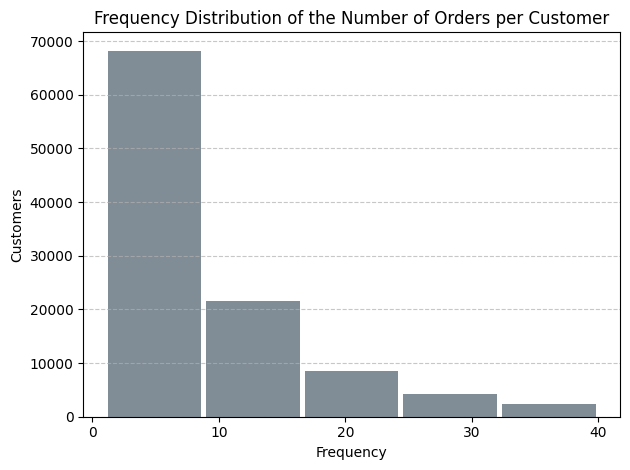

In [119]:
featured_color = (128 / 255, 140 / 255, 150 / 255)

data_filtered = data[data['frequency'] <= 40]

plt.hist(
    data_filtered['frequency'],
    bins=5,
    edgecolor=None,
    color=featured_color,
    rwidth=0.95
)

plt.title("Frequency Distribution of the Number of Orders per Customer")
plt.xlabel("Frequency")
plt.ylabel("Customers")

plt.xticks(range(0, 41, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Let's go for the second one:

In [111]:
query = """
    SELECT user_id, SUM(price) AS total_spent
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY user_id
    HAVING SUM(price) < 225;
"""

try:
    data = pd.read_sql(query, engine)
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


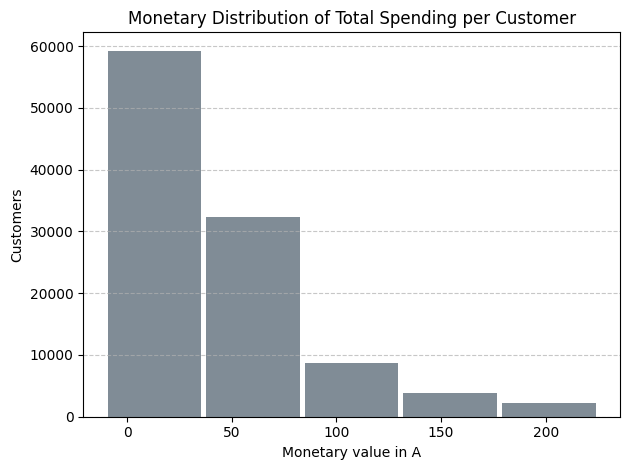

In [115]:
data_filtered = data[data['total_spent'] <= 260]

plt.hist(
    data_filtered['total_spent'],
    bins=5,
    edgecolor=None,
    color=featured_color,
    rwidth=0.95
)

plt.title("Monetary Distribution of Total Spending per Customer")
plt.xlabel("Monetary value in A")
plt.ylabel("Customers")
plt.xticks(range(0, 226, 50))  # Etiquetas del eje x en incrementos de 50
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()